In [22]:
import wandb
import os
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [23]:
api = wandb.Api()

In [24]:
"""
sample size 50: jlkn7dnj
sample size 100: 8g6gp2wm
sample size 200: 0aq5t9in

uci: 434rgxwa

"""
entity = "opent03-team"
project = "bayesian_dpddm"
sweep_id = "434rgxwa" 

In [25]:
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
runs = sweep.runs
data = []

In [26]:
for run in tqdm(runs):
    run_data = {
        "run_id": run.id,
        "name": run.name,
        "state": run.state,
        "config": run.config,
        "metrics": run.summary_metrics,
        "created_at": run.created_at,
    }
    data.append(run_data)

  0%|          | 0/958 [00:00<?, ?it/s]

In [27]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Expand nested config and metrics columns
df = df.join(pd.json_normalize(df.pop("config"), sep=".")).join(pd.json_normalize(df.pop("metrics"), sep="."))

# Save DataFrame as CSV
df.to_csv("uci_sweep.csv", index=False)

#print("Sweep data saved to wandb_sweep_results.csv")


,run_id,name,state,metrics,created_at,dataset,dpddm.temp,model.mid_layers,model.mid_features,dpddm.data_sample_size,...,val_loss,Phi-mean,Phi-med,Phi-std,dr_id,dr_ood,dr_train,fpr_id,fpr_train,tpr
0,2tshq2ms,honest-sweep-958,running,{},2025-05-16T03:09:38Z,uci,5,2,64,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,w4cjxjlk,worthy-sweep-957,running,{},2025-05-16T03:09:36Z,uci,5,2,16,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9wqenout,genial-sweep-956,running,{},2025-05-16T03:09:35Z,uci,5,4,32,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pir4ixci,dainty-sweep-955,running,{},2025-05-16T03:09:26Z,uci,5,2,32,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dcpsvfx1,pious-sweep-954,running,{},2025-05-16T03:09:24Z,uci,5,3,16,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,sdo2c8t6,dulcet-sweep-4,finished,"{'Phi-mean': 0.8936000264883042, 'Phi-med': 0....",2025-05-16T02:35:12Z,uci,2,3,32,10,...,0.481004,0.89360,0.90,0.056560,"[0.8990000283718109, 0.051951899312412855]","[0.9020000261068344, 0.056533172013827446]","[0.889000027179718, 0.054580217087099925]",0.12,0.10,0.17
954,sus6fflv,fragrant-sweep-6,finished,"{'Phi-mean': 0.6605000184774399, 'Phi-med': 0....",2025-05-16T02:35:12Z,uci,1,4,16,20,...,0.487624,0.66050,0.65,0.043643,"[0.6560000199079513, 0.04017460579124336]","[0.7275000011920929, 0.04815340102009977]","[0.6665000152587891, 0.0495252335417289]",0.05,0.11,0.48
955,czdos0kq,zesty-sweep-3,failed,{'_wandb': {'runtime': 5}},2025-05-16T02:35:11Z,uci,2,2,32,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,ehmmh60k,polar-sweep-2,finished,"{'Phi-mean': 0.6016799827814102, 'Phi-med': 0....",2025-05-16T02:35:11Z,uci,2,4,32,50,...,0.459515,0.60168,0.60,0.025306,"[0.6065999799966812, 0.023504044028782683]","[0.6429999870061874, 0.02286919070307336]","[0.6065999835729599, 0.027720753934865915]",0.19,0.18,0.71


In [21]:
# Group by data sample size
for size in [10, 20, 50]:
    subset = df[(df['dpddm.data_sample_size'] == size) & (df['fpr_id'] < 0.10)]
    tpr_mean = subset['tpr'].mean()
    tpr_std = subset['tpr'].std()
    
    print(f"Data Sample Size: {size}")
    print(f"  Avg TPR:  {tpr_mean:.4f}")
    print(f"  Std TPR:  {tpr_std:.4f}")
    print(f"  Count:    {len(subset)}\n")

# Group by data sample size and take top 20 TPRs under fpr_id < 0.10
for size in [10, 20, 50]:
    subset = df[(df['dpddm.data_sample_size'] == size) & (df['fpr_id'] < 0.10)]
    top_20 = subset.sort_values(by='tpr', ascending=False).head(20)
    
    tpr_mean = top_20['tpr'].mean()
    tpr_std = top_20['tpr'].std()
    
    print(f"Data Sample Size: {size}")
    print(f"  Avg TPR (top 20):  {tpr_mean:.4f}")
    print(f"  Std TPR (top 20):  {tpr_std:.4f}")
    print(f"  Count:             {len(top_20)}\n")


Data Sample Size: 10
  Avg TPR:  0.8103
  Std TPR:  0.1677
  Count:    139

Data Sample Size: 20
  Avg TPR:  0.8775
  Std TPR:  0.1504
  Count:    151

Data Sample Size: 50
  Avg TPR:  0.9028
  Std TPR:  0.1922
  Count:    187

Data Sample Size: 10
  Avg TPR (top 20):  0.9835
  Std TPR (top 20):  0.0067
  Count:             20

Data Sample Size: 20
  Avg TPR (top 20):  1.0000
  Std TPR (top 20):  0.0000
  Count:             20

Data Sample Size: 50
  Avg TPR (top 20):  1.0000
  Std TPR (top 20):  0.0000
  Count:             20



## Analysis

In [29]:
import matplotlib.pyplot as plt

In [30]:
#df = pd.read_csv('camelyon17_sweep.csv')
df.head()

,run_id,name,state,metrics,created_at,dataset,dpddm.temp,model.mid_layers,model.mid_features,dpddm.data_sample_size,...,val_loss,Phi-mean,Phi-med,Phi-std,dr_id,dr_ood,dr_train,fpr_id,fpr_train,tpr
0,2tshq2ms,honest-sweep-958,running,{},2025-05-16T03:09:38Z,uci,5,2,64,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,w4cjxjlk,worthy-sweep-957,running,{},2025-05-16T03:09:36Z,uci,5,2,16,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9wqenout,genial-sweep-956,running,{},2025-05-16T03:09:35Z,uci,5,4,32,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pir4ixci,dainty-sweep-955,running,{},2025-05-16T03:09:26Z,uci,5,2,32,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,dcpsvfx1,pious-sweep-954,running,{},2025-05-16T03:09:24Z,uci,5,3,16,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.columns

Index(['run_id', 'name', 'state', 'metrics', 'created_at', 'dataset',
       'dpddm.temp', 'model.mid_layers', 'model.mid_features',
       'dpddm.data_sample_size', 'model.reg_weight_factor', 'GPU',
       '_wandb.runtime', '_runtime', '_step', '_timestamp', 'seed',
       'ood_test_acc', 'ood_test_loss', 'train_acc', 'train_loss', 'val_acc',
       'val_loss', 'Phi-mean', 'Phi-med', 'Phi-std', 'dr_id', 'dr_ood',
       'dr_train', 'fpr_id', 'fpr_train', 'tpr'],
      dtype='object')

In [32]:
def get_best_tprs(df, fpr_ub):
    df = df.dropna(subset='tpr')
    new_df = df[df['fpr_id'] <= fpr_ub]
    best_run = new_df.iloc[new_df['tpr'].argmax()]
    return best_run

def plots(df):
    plt.scatter(df['tpr'], df['fpr_id'], c=df['fpr_train'])
    plt.axhline(0.05, c='r')
    

In [33]:
df = df.dropna(subset='tpr')

In [37]:
filtered = df[df['fpr_id'] <= 0.10]
filtered

,run_id,name,state,metrics,created_at,dataset,dpddm.temp,model.mid_layers,model.mid_features,dpddm.data_sample_size,...,val_loss,Phi-mean,Phi-med,Phi-std,dr_id,dr_ood,dr_train,fpr_id,fpr_train,tpr
39,slv21cmo,youthful-sweep-918,finished,"{'Phi-mean': 0.6807199875116349, 'Phi-med': 0....",2025-05-16T03:08:17Z,uci,5,4,64,50,...,0.427824,0.68072,0.68,0.022967,"[0.6807999902963638, 0.02057571685859226]","[0.6881999891996383, 0.02368037318391289]","[0.6807999885082245, 0.024967183387705188]",0.07,0.10,0.15
45,eigxv6uu,summer-sweep-912,finished,"{'Phi-mean': 0.5194399852156639, 'Phi-med': 0....",2025-05-16T03:07:55Z,uci,1,4,16,50,...,0.487624,0.51944,0.52,0.028080,"[0.5101999869942665, 0.02734885366128178]","[0.5835999822616578, 0.024556871326617127]","[0.5195999854803085, 0.026073737809750995]",0.09,0.14,0.92
48,dkfeuwch,crisp-sweep-910,finished,"{'Phi-mean': 0.44507998818159106, 'Phi-med': 0...",2025-05-16T03:07:52Z,uci,1,2,64,50,...,0.471717,0.44508,0.44,0.030103,"[0.4439999884366989, 0.02898275373916666]","[0.5207999849319458, 0.027410942182972405]","[0.4491999873518944, 0.030908899058955195]",0.04,0.08,0.88
99,hy64iieb,hardy-sweep-859,finished,"{'Phi-mean': 0.44507998818159106, 'Phi-med': 0...",2025-05-16T03:05:57Z,uci,1,2,64,50,...,0.471717,0.44508,0.44,0.030103,"[0.4439999884366989, 0.02898275373916666]","[0.5207999849319458, 0.027410942182972405]","[0.4491999873518944, 0.030908899058955195]",0.04,0.08,0.88
104,ibi6vepx,royal-sweep-854,finished,"{'Phi-mean': 0.5869599838256836, 'Phi-med': 0....",2025-05-16T03:05:42Z,uci,2,2,64,50,...,0.471717,0.58696,0.58,0.027239,"[0.589399983882904, 0.025527241449086163]","[0.6349999850988388, 0.02673948282199401]","[0.5859999817609787, 0.02505992610776402]",0.08,0.05,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,pqi4lxtv,dutiful-sweep-16,finished,"{'Phi-mean': 0.457959988296032, 'Phi-med': 0.4...",2025-05-16T02:35:16Z,uci,1,4,64,50,...,0.431887,0.45796,0.46,0.032666,"[0.45699998795986174, 0.030773365064247864]","[0.47899998784065245, 0.02819574444430289]","[0.45619998753070834, 0.03158417548062647]",0.04,0.03,0.14
946,bo537q68,visionary-sweep-12,finished,"{'Phi-mean': 0.8938000264167786, 'Phi-med': 0....",2025-05-16T02:35:15Z,uci,2,3,32,10,...,0.481004,0.89380,0.90,0.057110,"[0.8950000286102295, 0.04974937113647355]","[0.9100000256299972, 0.0556776366698502]","[0.8930000269412994, 0.05523585723226423]",0.10,0.12,0.21
950,5thu62h3,desert-sweep-8,finished,"{'Phi-mean': 0.8296000185012817, 'Phi-med': 0....",2025-05-16T02:35:13Z,uci,5,2,64,20,...,0.470944,0.82960,0.85,0.034115,"[0.8285000187158584, 0.03102822036590286]","[0.8385000205039979, 0.03070423939165291]","[0.8345000201463699, 0.03216753788227051]",0.05,0.09,0.08
952,j3m00y5x,eager-sweep-7,finished,"{'Phi-mean': 0.6262799881696701, 'Phi-med': 0....",2025-05-16T02:35:12Z,uci,2,4,16,50,...,0.487624,0.62628,0.62,0.023659,"[0.6231999856233597, 0.02378571102774594]","[0.6615999835729599, 0.02633325077607771]","[0.6287999868392944, 0.025506079574354096]",0.02,0.07,0.28


In [41]:
# Filter to only rows with fpr_id <= 0.10
filtered = df[df['fpr_id'] <= 0.10]

# Define the hyperparameter columns you care about
hyperparam_cols = [
    'seed', 'dpddm.temp', 'model.mid_layers', 'model.mid_features',
    'dpddm.data_sample_size', 'model.reg_weight_factor'
]

# Get the best row (max TPR) for each data sample size
best_rows = (
    filtered.loc[filtered.groupby('dpddm.data_sample_size')['tpr'].idxmax()]
    [hyperparam_cols + ['tpr', 'fpr_id']]
    .sort_values(by='dpddm.data_sample_size')
)

print(best_rows)


     seed  dpddm.temp  model.mid_layers  model.mid_features  \
928  57.0           1                 3                  16   
320  57.0           1                 3                  16   
640  57.0           1                 4                  16   

     dpddm.data_sample_size  model.reg_weight_factor   tpr  fpr_id  
928                      10                       50  0.58    0.09  
320                      20                       10  0.68    0.05  
640                      50                       50  0.93    0.09  


In [40]:
df.columns

Index(['run_id', 'name', 'state', 'metrics', 'created_at', 'dataset',
       'dpddm.temp', 'model.mid_layers', 'model.mid_features',
       'dpddm.data_sample_size', 'model.reg_weight_factor', 'GPU',
       '_wandb.runtime', '_runtime', '_step', '_timestamp', 'seed',
       'ood_test_acc', 'ood_test_loss', 'train_acc', 'train_loss', 'val_acc',
       'val_loss', 'Phi-mean', 'Phi-med', 'Phi-std', 'dr_id', 'dr_ood',
       'dr_train', 'fpr_id', 'fpr_train', 'tpr'],
      dtype='object')

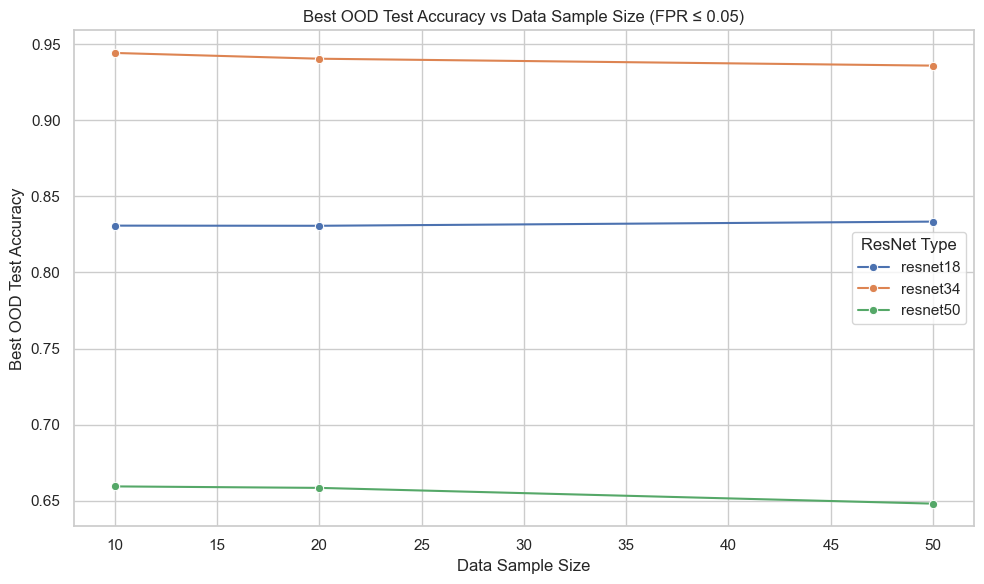

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid runs
valid_df = df[df['fpr_id'] <= 0.05]

# Keep only desired data_sample_sizes
#valid_df = valid_df[valid_df['dpddm.data_sample_size'].isin([10, 20, 50])]

# Group by resnet type and data_sample_size, get best ood_test_acc
best_runs = (
    valid_df.sort_values('tpr', ascending=False)
    .groupby(['model.resnet_type', 'dpddm.data_sample_size'], as_index=False)
    .first()
)

# Set seaborn style
sns.set_theme(style='whitegrid')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=best_runs,
    x='dpddm.data_sample_size',
    y='ood_test_acc',
    hue='model.resnet_type',
    marker='o'
)

plt.title("Best OOD Test Accuracy vs Data Sample Size (FPR ≤ 0.05)")
plt.xlabel("Data Sample Size")
plt.ylabel("Best OOD Test Accuracy")
plt.legend(title='ResNet Type')
plt.tight_layout()
plt.show()


In [51]:
valid_df = df[df['fpr_id'] <= 0.05]
valid_df = valid_df.drop(columns=['run_id', 'name', 'state', 'created_at', 'dataset', 'dataset.frac',
                       '_runtime', '_step', '_timestamp', '_wandb.runtime'])
r18df = valid_df[valid_df['model.resnet_type']=='resnet18']
r34df = valid_df[valid_df['model.resnet_type']=='resnet34']
r50df = valid_df[valid_df['model.resnet_type']=='resnet50']
len(r18df), len(r34df), len(r50df)

(51, 70, 36)

In [53]:
# Filter valid runs
valid_df = df[df['fpr_id'] <= 0.05]

# Focus on relevant columns
cols_to_keep = ['model.resnet_type', 'dpddm.data_sample_size', 'tpr']
valid_df = valid_df[cols_to_keep]

# Only keep the specified sample sizes
valid_df = valid_df[valid_df['dpddm.data_sample_size'].isin([10, 20, 50])]

# Group by resnet type and sample size, get max TPR
best_tpr = (
    valid_df.groupby(['model.resnet_type', 'dpddm.data_sample_size'])['tpr']
    .max()
    .unstack()
)

print(best_tpr)


dpddm.data_sample_size    10   20   50
model.resnet_type                     
resnet18                0.98  1.0  1.0
resnet34                0.98  1.0  1.0
resnet50                0.98  1.0  1.0


In [54]:
# Define hyperparameter columns
hyperparams = [
    'model.prior_scale',
    'model.wishart_scale',
    'model.freeze_features',
    'model.reg_weight_factor',
    'dpddm.temp'
]

# Filter again just to be safe
valid_df = df[df['fpr_id'] <= 0.05]
valid_df = valid_df[valid_df['dpddm.data_sample_size'].isin([10, 20, 50])]

# Initialize list to collect rows
best_rows = []

# Iterate over resnet types and sample sizes
for resnet_type in ['resnet18', 'resnet34', 'resnet50']:
    for sample_size in [10, 20, 50]:
        subset = valid_df[
            (valid_df['model.resnet_type'] == resnet_type) &
            (valid_df['dpddm.data_sample_size'] == sample_size)
        ]
        if not subset.empty:
            # Get row with max TPR
            best_row = subset.loc[subset['tpr'].idxmax()]
            best_rows.append({
                'resnet_type': resnet_type,
                'data_sample_size': sample_size,
                'tpr': best_row['tpr'],
                **{param: best_row[param] for param in hyperparams}
            })

# Convert results to DataFrame
best_hyperparams_df = pd.DataFrame(best_rows)

# Display
best_hyperparams_df


,resnet_type,data_sample_size,tpr,model.prior_scale,model.wishart_scale,model.freeze_features,model.reg_weight_factor,dpddm.temp
0,resnet18,10,0.98,1,1,False,100,2
1,resnet18,20,1.00,1,1,False,100,5
2,resnet18,50,1.00,1,1,False,100,5
3,resnet34,10,0.98,5,2,False,1,5
4,resnet34,20,1.00,2,5,False,100,5
5,resnet34,50,1.00,5,5,True,100,2
6,resnet50,10,0.98,1,5,True,1,1
7,resnet50,20,1.00,5,5,True,10,2
8,resnet50,50,1.00,5,2,True,100,5


In [68]:
# Define hyperparameter columns
hyperparams = [
    'model.prior_scale',
    'model.wishart_scale',
    'model.freeze_features',
    'model.reg_weight_factor',
    'dpddm.temp'
]

# Filter valid runs
valid_df = df[df['fpr_id'] <= 0.05]
valid_df = valid_df[valid_df['dpddm.data_sample_size'].isin([10, 20, 50])]

# Initialize list to collect rows
best_rows = []

# Iterate over resnet types and sample sizes
for resnet_type in ['resnet18', 'resnet34', 'resnet50']:
    for sample_size in [10, 20, 50]:
        subset = valid_df[
            (valid_df['model.resnet_type'] == resnet_type) &
            (valid_df['dpddm.data_sample_size'] == sample_size)
        ]
        if not subset.empty:
            max_tpr = subset['tpr'].max()
            top_rows = subset[subset['tpr'] == max_tpr]
            for _, row in top_rows.iterrows():
                best_rows.append({
                    'resnet_type': resnet_type,
                    'data_sample_size': sample_size,
                    'tpr': row['tpr'],
                    **{param: row[param] for param in hyperparams}
                })

# Convert to DataFrame
best_hyperparams_df = pd.DataFrame(best_rows)

# Display all results
# Split into separate tables by resnet_type
r18_best = best_hyperparams_df[best_hyperparams_df['resnet_type'] == 'resnet18']
r34_best = best_hyperparams_df[best_hyperparams_df['resnet_type'] == 'resnet34']
r50_best = best_hyperparams_df[best_hyperparams_df['resnet_type'] == 'resnet50']

# Display
print("Best hyperparams for ResNet-18")
display(r18_best)

print("Best hyperparams for ResNet-34")
display(r34_best)

print("Best hyperparams for ResNet-50")
display(r50_best)


Best hyperparams for ResNet-18


,resnet_type,data_sample_size,tpr,model.prior_scale,model.wishart_scale,model.freeze_features,model.reg_weight_factor,dpddm.temp
0,resnet18,10,0.98,1,1,False,100,2
1,resnet18,10,0.98,2,5,False,10,2
2,resnet18,10,0.98,1,5,False,100,2
3,resnet18,20,1.00,1,1,False,100,5
4,resnet18,50,1.00,1,1,False,100,5
5,resnet18,50,1.00,2,5,False,1,10
6,resnet18,50,1.00,1,2,False,100,1
7,resnet18,50,1.00,1,2,False,100,1


Best hyperparams for ResNet-34


,resnet_type,data_sample_size,tpr,model.prior_scale,model.wishart_scale,model.freeze_features,model.reg_weight_factor,dpddm.temp
8,resnet34,10,0.98,5,2,False,1,5
9,resnet34,20,1.00,2,5,False,100,5
10,resnet34,50,1.00,5,5,True,100,2
11,resnet34,50,1.00,2,2,False,100,5
12,resnet34,50,1.00,5,2,True,100,2
13,resnet34,50,1.00,1,2,True,10,2
14,resnet34,50,1.00,5,1,False,100,10
15,resnet34,50,1.00,5,5,True,100,2


Best hyperparams for ResNet-50


,resnet_type,data_sample_size,tpr,model.prior_scale,model.wishart_scale,model.freeze_features,model.reg_weight_factor,dpddm.temp
16,resnet50,10,0.98,1,5,True,1,1
17,resnet50,10,0.98,2,1,True,1,1
18,resnet50,10,0.98,2,5,True,1,1
19,resnet50,10,0.98,5,2,True,1,1
20,resnet50,10,0.98,5,2,True,10,1
21,resnet50,10,0.98,5,1,True,1,1
22,resnet50,10,0.98,2,5,True,1,1
23,resnet50,10,0.98,5,2,True,10,1
24,resnet50,20,1.00,5,5,True,10,2
25,resnet50,20,1.00,2,5,True,100,2


In [65]:
r34df[
      (r34df['dpddm.data_sample_size'] == 20) &
      (r34df['model.reg_weight_factor'] == 10)
      ]

,metrics,dpddm.temp,model.prior_scale,model.resnet_type,model.wishart_scale,model.freeze_features,dpddm.data_sample_size,model.reg_weight_factor,model.resnet_pretrained,GPU,...,val_loss,Phi-mean,Phi-med,Phi-std,dr_id,dr_ood,dr_train,fpr_id,fpr_train,tpr
331,"{'Phi-mean': 0.44030000853538515, 'Phi-med': 0...",2,5,resnet34,2,True,20,10,True,NVIDIA RTX A6000,...,0.146137,0.4403,0.45,0.056841,"[0.44000000834465025, 0.05049752675741975]","[0.5745000180602073, 0.04821566899148328]","[0.4400000077486038, 0.0500000011324888]",0.04,0.05,0.87
482,"{'Phi-mean': 0.5123000082969665, 'Phi-med': 0....",10,1,resnet34,5,False,20,10,True,NVIDIA H100 80GB HBM3,...,0.033853,0.5123,0.50,0.043055,"[0.5040000081062317, 0.04282522705416639]","[0.6525000184774399, 0.04602987023595505]","[0.5085000085830689, 0.043043583916169685]",0.03,0.06,0.97
559,"{'Phi-mean': 0.44200000882148743, 'Phi-med': 0...",2,2,resnet34,1,True,20,10,True,NVIDIA TITAN X (Pascal),...,0.146421,0.4420,0.45,0.054553,"[0.4420000085234642, 0.05418487065501834]","[0.5780000168085099, 0.05211526226318577]","[0.4435000079870224, 0.04881342104410456]",0.05,0.04,0.87
789,"{'Phi-mean': 0.4401000084280968, 'Phi-med': 0....",2,2,resnet34,1,True,20,10,True,NVIDIA RTX A5000,...,0.146420,0.4401,0.45,0.055380,"[0.4440000087022781, 0.05063595734211983]","[0.5775000178813934, 0.04968652466350664]","[0.44250000804662704, 0.05068283852251631]",0.04,0.06,0.86
889,"{'Phi-mean': 0.43900000858306887, 'Phi-med': 0...",2,5,resnet34,5,True,20,10,True,NVIDIA RTX A5000,...,0.146136,0.4390,0.45,0.055399,"[0.442000008225441, 0.052306789492135304]","[0.5735000175237656, 0.047673376067869776]","[0.44150000780820847, 0.0505247476666548]",0.04,0.05,0.86
937,"{'Phi-mean': 0.43900000858306887, 'Phi-med': 0...",2,5,resnet34,2,True,20,10,True,NVIDIA RTX A5000,...,0.146136,0.4390,0.45,0.055399,"[0.442000008225441, 0.052306789492135304]","[0.5735000175237656, 0.047673376067869776]","[0.44150000780820847, 0.0505247476666548]",0.04,0.05,0.86
1042,"{'Phi-mean': 0.4405000085234642, 'Phi-med': 0....",2,5,resnet34,5,True,20,10,True,NVIDIA RTX A6000,...,0.146133,0.4405,0.45,0.056787,"[0.44000000834465025, 0.05049752675741975]","[0.5740000179409981, 0.04820789080883624]","[0.4405000078678131, 0.04984726786621027]",0.04,0.05,0.87
1182,"{'Phi-mean': 0.43900000858306887, 'Phi-med': 0...",2,5,resnet34,1,True,20,10,True,NVIDIA RTX A5000,...,0.146136,0.4390,0.45,0.055399,"[0.442000008225441, 0.052306789492135304]","[0.5735000175237656, 0.047673376067869776]","[0.44150000780820847, 0.0505247476666548]",0.04,0.05,0.86
2005,"{'Phi-mean': 0.44540000867843627, 'Phi-med': 0...",2,1,resnet34,2,True,20,10,True,NVIDIA H100 80GB HBM3,...,0.146864,0.4454,0.45,0.058214,"[0.4460000094771385, 0.0467332867209027]","[0.583000019788742, 0.0506063328364827]","[0.4430000075697899, 0.05050742630482757]",0.05,0.04,0.88
2049,"{'Phi-mean': 0.5125000079274178, 'Phi-med': 0....",10,1,resnet34,5,False,20,10,True,NVIDIA RTX A5000,...,0.034402,0.5125,0.50,0.042647,"[0.5150000074505806, 0.040311291735677206]","[0.6645000147819519, 0.050147270601496506]","[0.5110000070929527, 0.04036087500767677]",0.05,0.07,0.98


## CIFAR-10.1 analysis

In [ ]:
hist_data = new_df[new_df['model.mid_channels'] == 512]['tpr']
plt.hist(hist_data, bins=20)
print(np.mean(hist_data))

0.8451948051948052


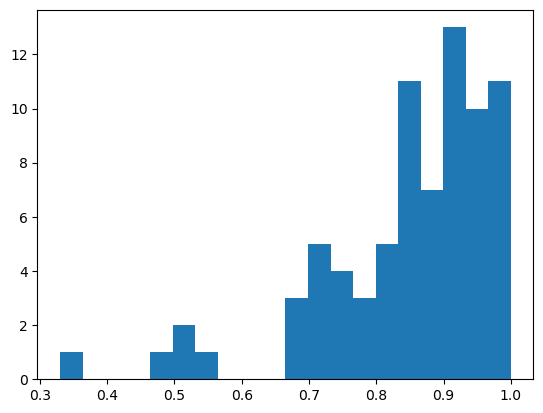

In [36]:
hist_data = new_df[new_df['model.mid_channels'] == 256]['tpr']
plt.hist(hist_data, bins=20)
print(np.mean(hist_data))

0.8666037735849058


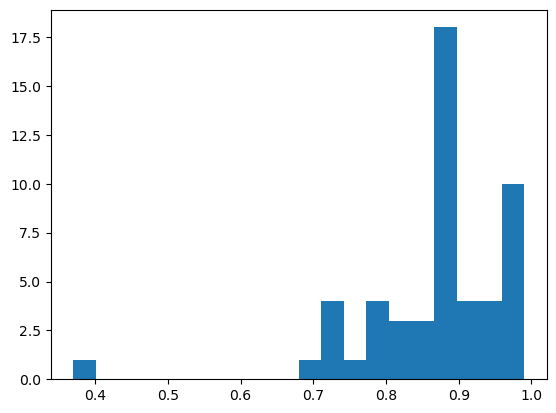

In [37]:
hist_data = new_df[new_df['model.mid_channels'] == 128]['tpr']
plt.hist(hist_data, bins=20)
print(np.mean(hist_data))

In [51]:
best = new_df[new_df.run_id == 'xexqstqs']
print(best)

       run_id              name     state  \
451  xexqstqs  fallen-sweep-496  finished   

                                               metrics            created_at  \
451  {'Phi-mean': 0.12979999624192717, 'Phi-med': 0...  2025-02-26T03:58:11Z   

     dataset  dpddm.temp  model.hidden_dim  model.mid_layers  \
451  cifar10        1000               128                 4   

     model.kernel_size  ...  Phi-mean  Phi-med   Phi-std  \
451                  5  ...    0.1298     0.13  0.014292   

                                         dr_ood  \
451  [0.1782999962568283, 0.013476274840539069]   

                                        dr_test  \
451  [0.12429999642074108, 0.01400035677201967]   

                                        dr_train  fpr_id  fpr_train  tpr  \
451  [0.13024999581277372, 0.014480589548157582]    0.03       0.06  1.0   

     _wandb.runtime  
451          8279.0  

[1 rows x 30 columns]


In [53]:
print(best['model.mid_channels'])
print(best['model.hidden_dim'])
print(best['model.reg_weight_factor'])

451    512
Name: model.mid_channels, dtype: int64
451    128
Name: model.hidden_dim, dtype: int64
451    100
Name: model.reg_weight_factor, dtype: int64


451    128
Name: model.hidden_dim, dtype: int64

In [ ]:
best

In [10]:
df

,run_id,name,state,metrics,created_at,dataset,dpddm.temp,dataset.frac,model.prior_scale,model.resnet_type,...,_wandb.runtime,Phi-mean,Phi-med,Phi-std,dr_id,dr_ood,dr_train,fpr_id,fpr_train,tpr
31,tufm0c3e,unique-sweep-3022,finished,"{'Phi-mean': 0.37320000740885734, 'Phi-med': 0...",2025-04-16T20:35:11Z,camelyon17,1,1,5,resnet34,...,740.0,0.37320,0.40,0.083437,"[0.3770000070333481, 0.1018381059469147]","[0.5370000085234642, 0.08081460618772834]","[0.3850000077486038, 0.0983615775918415]",0.20,0.24,0.88
43,whgw8zw2,firm-sweep-3010,finished,"{'Phi-mean': 0.4281000078320503, 'Phi-med': 0....",2025-04-16T20:28:15Z,camelyon17,2,1,5,resnet50,...,1104.0,0.42810,0.45,0.054455,"[0.4220000073313714, 0.051146852530783306]","[0.6715000122785568, 0.05062359822416918]","[0.4205000078678131, 0.04903825359032918]",0.13,0.13,1.00
47,3uygyih8,classic-sweep-3006,finished,"{'Phi-mean': 0.39880000677704813, 'Phi-med': 0...",2025-04-16T20:25:16Z,camelyon17,1,1,1,resnet50,...,1059.0,0.39880,0.40,0.080241,"[0.3930000065267086, 0.09083501348126412]","[0.6710000091791153, 0.09087903698949454]","[0.3990000070631504, 0.09219001987084516]",0.22,0.24,1.00
50,sem43m3q,daily-sweep-3003,finished,"{'Phi-mean': 0.22663999393582343, 'Phi-med': 0...",2025-04-16T20:23:31Z,camelyon17,1,1,2,resnet18,...,1444.0,0.22664,0.22,0.030025,"[0.2221999940276146, 0.029785232049004153]","[0.3251999917626381, 0.03505652442086226]","[0.22279999405145645, 0.030727187127719893]",0.06,0.09,0.97
52,gvydwxad,devout-sweep-3001,finished,"{'Phi-mean': 0.3068000047802925, 'Phi-med': 0....",2025-04-16T20:23:03Z,camelyon17,5,1,1,resnet50,...,1093.0,0.30680,0.30,0.042706,"[0.2990000055730343, 0.04241461954964909]","[0.4925000092387199, 0.05494315402617201]","[0.30550000369548796, 0.045768437616589594]",0.05,0.05,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,oloh0zaw,lemon-sweep-6,finished,"{'Phi-mean': 0.07343999788910151, 'Phi-med': 0...",2025-04-15T18:15:54Z,camelyon17,2,1,5,resnet34,...,2298.0,0.07344,0.08,0.017532,"[0.07439999774098396, 0.01745393820443363]","[0.16879999540746213, 0.028749954315895877]","[0.07239999789744615, 0.0176136299324844]",0.18,0.15,1.00
3055,owukc1po,gallant-sweep-9,finished,"{'Phi-mean': 0.39695998692512513, 'Phi-med': 0...",2025-04-15T18:15:54Z,camelyon17,10,1,1,resnet50,...,2097.0,0.39696,0.40,0.025930,"[0.3981999880075454, 0.029133483486004495]","[0.5391999807953834, 0.03032094834787557]","[0.397999986410141, 0.02720294044778378]",0.14,0.17,1.00
3056,61z5eih2,pious-sweep-1,finished,"{'Phi-mean': 0.8230000166893006, 'Phi-med': 0....",2025-04-15T18:15:53Z,camelyon17,5,1,2,resnet18,...,1353.0,0.82300,0.80,0.060754,"[0.8230000168085099, 0.05450689135956031]","[0.893000026345253, 0.05701754021348671]","[0.8380000197887421, 0.059632217042426126]",0.27,0.40,0.80
3057,6cqequ40,zesty-sweep-2,finished,"{'Phi-mean': 0.6776000114679337, 'Phi-med': 0....",2025-04-15T18:15:53Z,camelyon17,5,1,1,resnet34,...,1845.0,0.67760,0.70,0.043912,"[0.6805000132322312, 0.04055550182056884]","[0.7565000021457672, 0.04040730938330434]","[0.6840000092983246, 0.03929375008204013]",0.13,0.12,0.82
